# Lab | Customer Analysis Final Round

## 1 - Problem (case study)
The objective of this data is to understand customer demographics and buying behavior. For this purpose we are going to clean this data and make an exploratory analysis. In addition, we are going to check the distribution of the different variables and finally, we are going to create a machine learning model in order to be able to predict a target variable.

In [28]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## 2 - Getting Data


To start with this exercise, reading the data is required.

In [3]:
df_cust=pd.read_csv('marketing_customer_analysis.csv')
pd.set_option('display.max_columns', None)
df_cust.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 3 - Cleaning/Wrangling/EDA
In this step we are going to change the names of the headers, deal with NaN values and clean the data. After this we are going to explore the data.

In [4]:
# Show the dataframe shape
df_cust.shape

(9134, 24)

In [5]:
# Standardize header names
df_cust.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
df_cust.columns=df_cust.columns.str.lower().str.replace(' ', '_').str.replace(':', '')
df_cust.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
# Which columns are numerical?
df_cust.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [8]:
# These are the numerical columns

df_cust.select_dtypes(include=np.number).columns.tolist()

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [9]:
# 4. Which columns are categorical?

df_cust.select_dtypes(include=np.object).columns.tolist()

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [10]:
df_cust.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [16]:
# First of all we are going to delete the rows with more than one value that is not a number as we will consider 
# that this observation is not reliable

df_cust.dropna(thresh=len(df_cust.columns)-1,inplace=True) 
df_cust.shape

(9134, 24)

In [17]:
# Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show 
#only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, 
#consider only January and February.

In [24]:
df_cust['effective_to_date'].dtype

dtype('O')

In [25]:


# We are going to provide the date format to the dates.
df_cust['effective_to_date']=pd.to_datetime(df_cust['effective_to_date'])

# Now we are going to extract the month to another column.

df_cust['month'] = pd.DatetimeIndex(df_cust['effective_to_date']).month


In [33]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [26]:
df_cust.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [27]:
# Now we will generate a definitive dataframe just including the observations from January and February 
# (as there is none from March)
df_cust=df_cust[(df_cust['month']==1)|(df_cust['month']==2)|(df_cust['month']==3)]
df_cust['month'].value_counts()

1    4898
2    4236
Name: month, dtype: int64

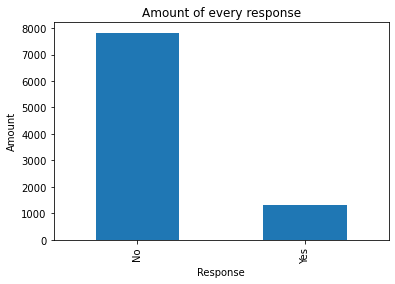

In [36]:
# Total amount of responses
df_cust['response'].value_counts().plot(kind='bar')
plt.xlabel('Response')
plt.ylabel('Amount')
plt.title('Amount of every response');

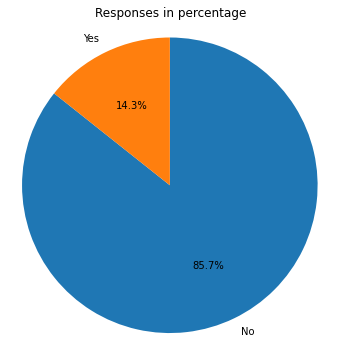

In [37]:
# As a percentage in pie chart

count_response=df_cust['response'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(count_response, labels = count_response.index, autopct='%.1f%%', startangle = 90, counterclock = False);
plt.axis('square')
plt.title('Responses in percentage');

In [38]:
# A plot of the response rate by the sales channel
df_cust['sales_channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

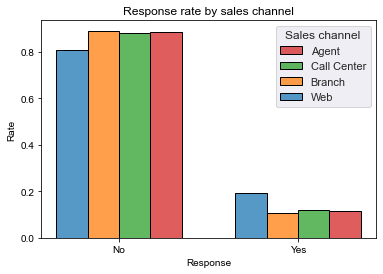

In [39]:
ay = sb.histplot(x = df_cust['response'], hue=df_cust['sales_channel'], multiple="dodge", 
                  stat = 'density', shrink = 0.7, common_norm=False)
# With "common_norm = False" we achieve that the normalized values by sales channels sum up 1, otherwise the values would be 
# calculated taking into account all the responses. However, we are interested in knowing the normalized values by sales channel
# in order to be able to compare the results between the different sales channels hence normalizing each histogram independently.

sb.set(rc={'figure.figsize':(18,7)})
plt.xlabel('Response')
plt.ylabel('Rate')
plt.legend(title='Sales channel', loc='upper right', labels=['Agent','Call Center','Branch','Web'])
plt.title('Response rate by sales channel');
plt.show()

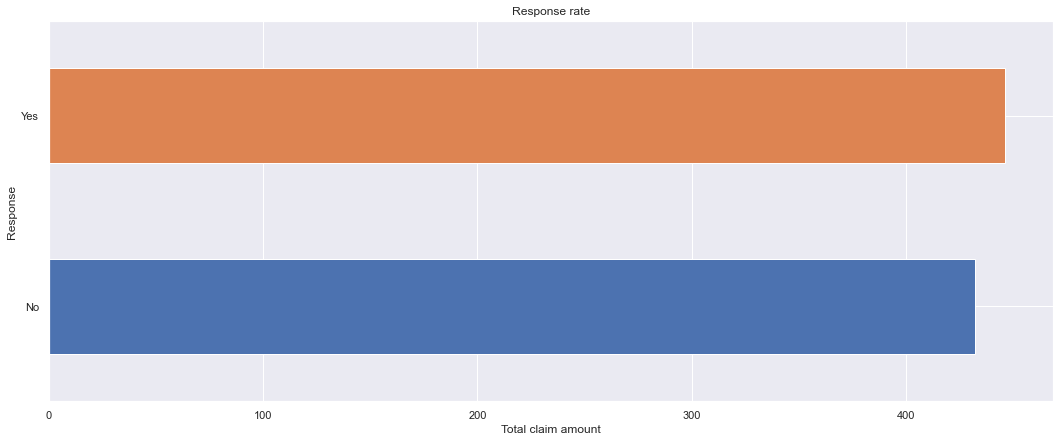

In [40]:
# Show a plot of the response rate by the total claim amount. Here we will do an histogram with bins
no_yes=df_cust.groupby('response')['total_claim_amount'].mean()
no_yes.plot.barh(color=['C0', 'C1'])
plt.xlabel('Total claim amount')
plt.ylabel('Response')
plt.title('Response rate');
plt.show()

# Below we are plotting the amount of total claims for every type of response,hence the amount of claims for every "yes" response
# and for every "no" response.

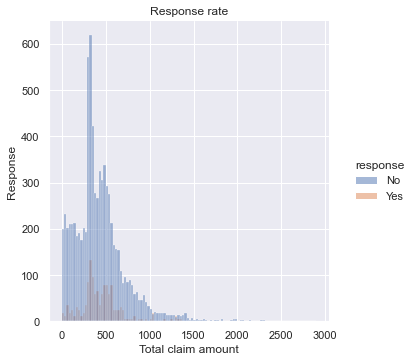

In [41]:
# Now we are going to plot responses by total claim amount:
sb.displot(data=df_cust, x="total_claim_amount", hue="response")
plt.xlabel('Total claim amount')
plt.ylabel('Response')
plt.title('Response rate')
plt.show()

In [42]:
# Response rate by income
df_cust['income'].max(), df_cust['income'].min() # to know the minimum and maximum incomes.

(99981, 0)

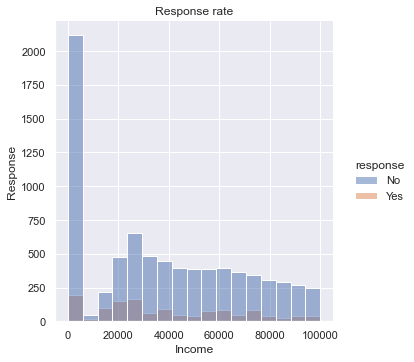

In [43]:
# In order to have a better insight of the responses depending on the income so we can clearly compare "yes" and "no":
sb.displot(data=df_cust, x="income", hue="response")
plt.xlabel('Income')
plt.ylabel('Response')
plt.title('Response rate')
plt.show()

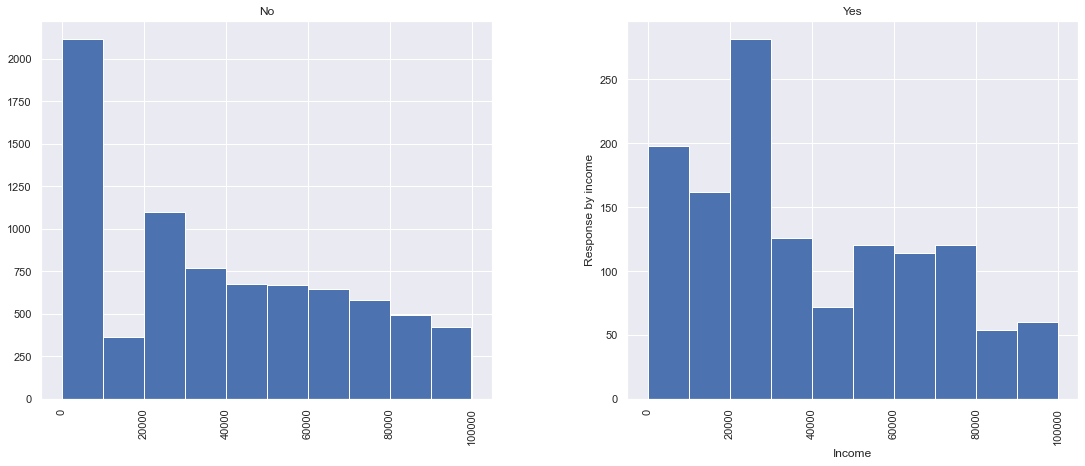

In [44]:
# In the following histograms it is possible to visualize how many "yes" and "no" responses are given by income within
# 10,000$ bins.

df_cust['income'].hist(by=df_cust['response'])
plt.xlabel('Income')
plt.ylabel('Response by income')
plt.show()

In [45]:
# We will create one dataframe with categorical columns and another one with numerical columns.
# 'effective to date' column has 'datetime' format, which does not belong to none of these categories.
numerical = df_cust.select_dtypes(include=np.number)
categoricals = df_cust.select_dtypes(include=['object'])

In [46]:
numerical.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
month                              int64
dtype: object

In [47]:
numerical.head(2)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,2763.519279,56274,69,32,5,0,1,384.811147,2
1,6979.535903,0,94,13,42,0,8,1131.464935,1


In [48]:
categoricals.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [49]:
categoricals.head(2)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize


In [51]:
list_col_num=numerical.columns.tolist()
list_col_num

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount',
 'month']

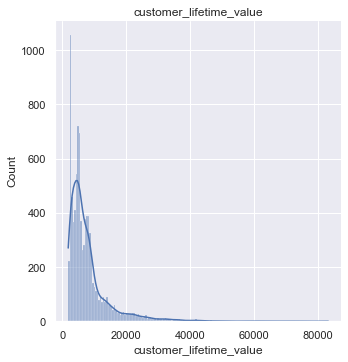

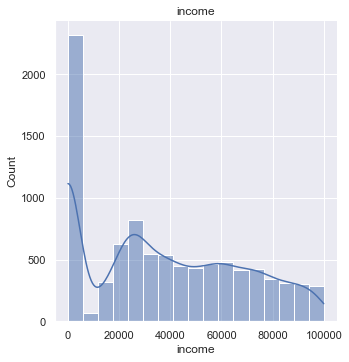

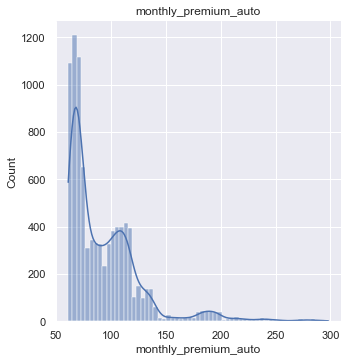

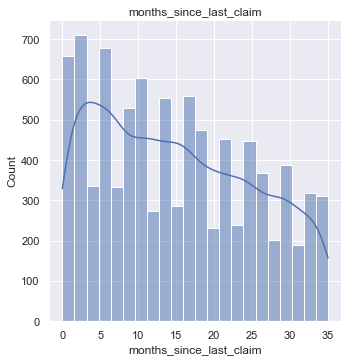

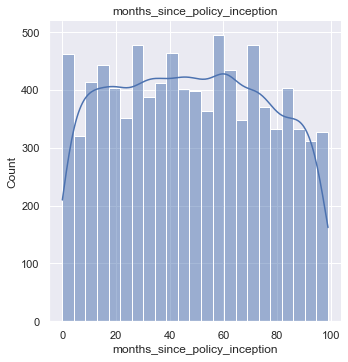

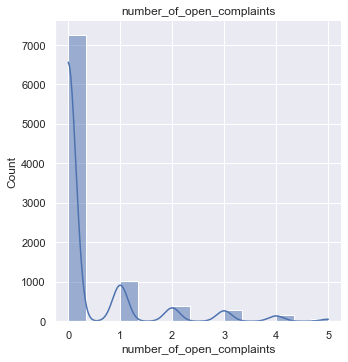

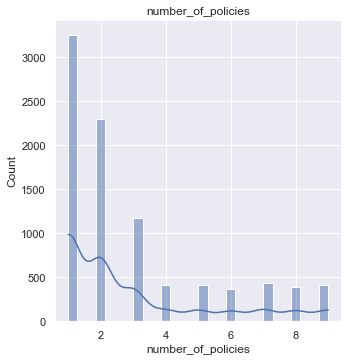

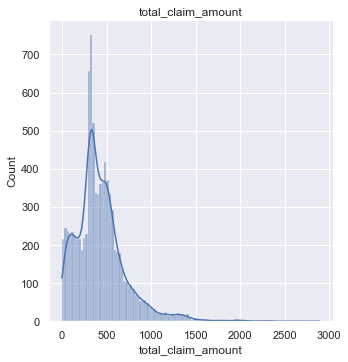

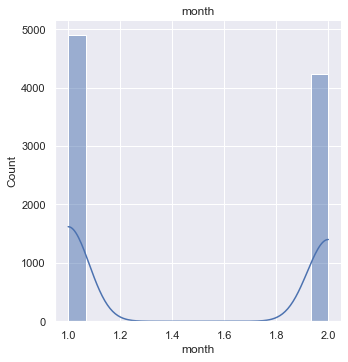

In [53]:
for i in list_col_num:
    ax = sb.displot(numerical[i],kde=True).set(title=i) 
    plt.show()

## 4 - Processing Data
Dealing with outliers.
Normalization.
Encoding Categorical Data.
Splitting into train set and test set.

In [34]:
#  Describe DataFrame to have an overview of the data values.
df_cust.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


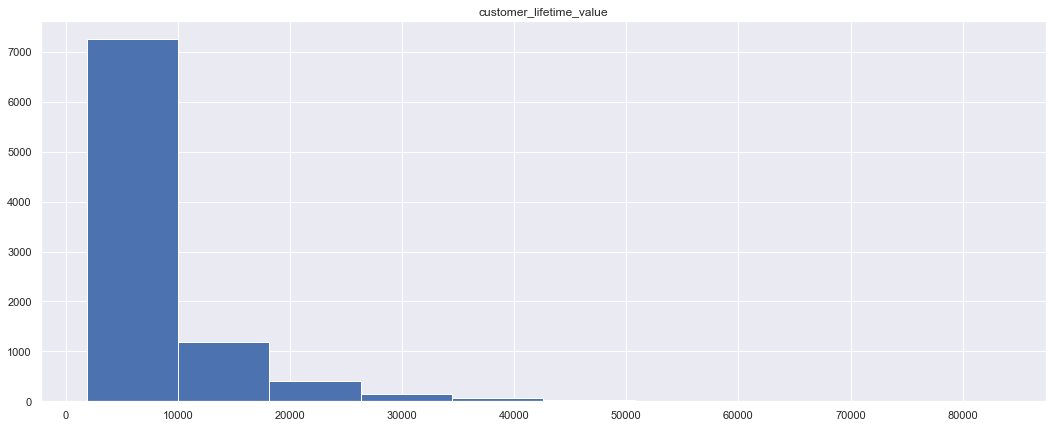

<Figure size 144x144 with 0 Axes>

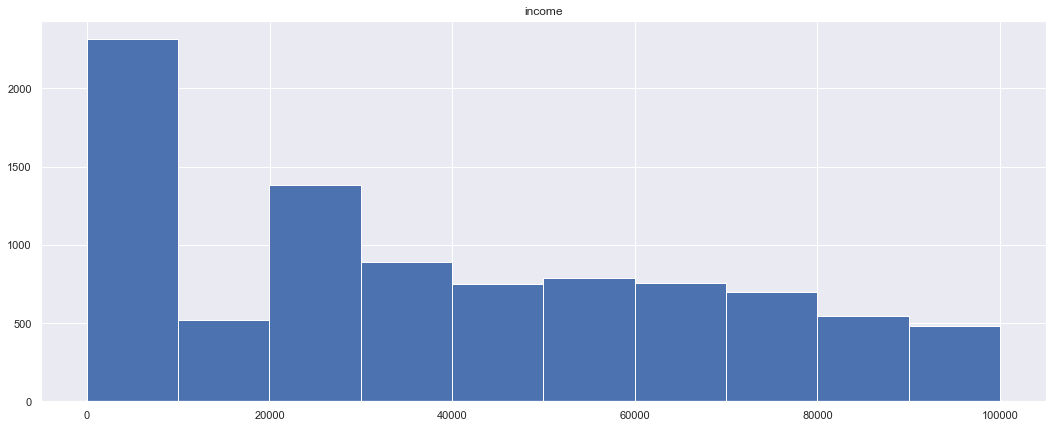

<Figure size 144x144 with 0 Axes>

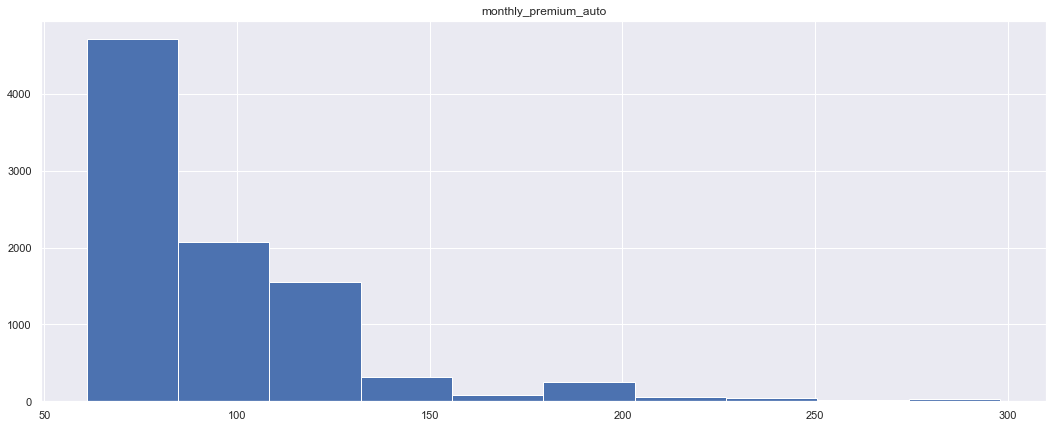

<Figure size 144x144 with 0 Axes>

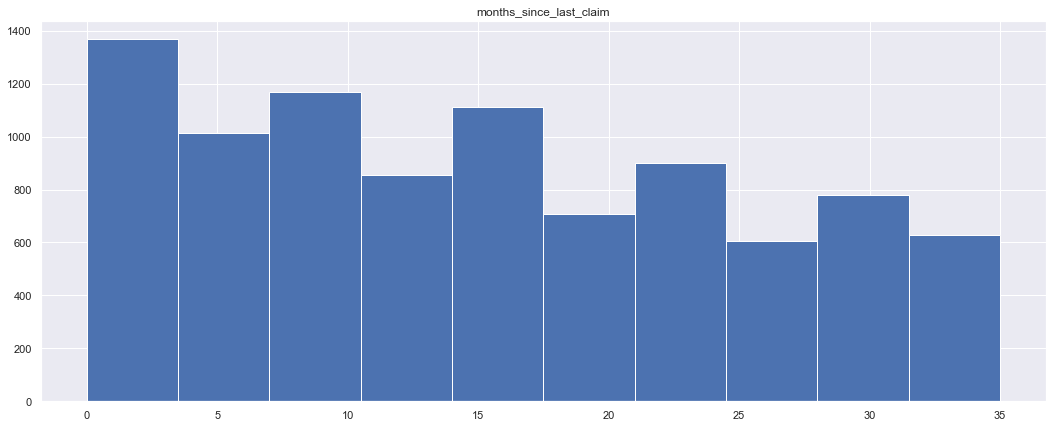

<Figure size 144x144 with 0 Axes>

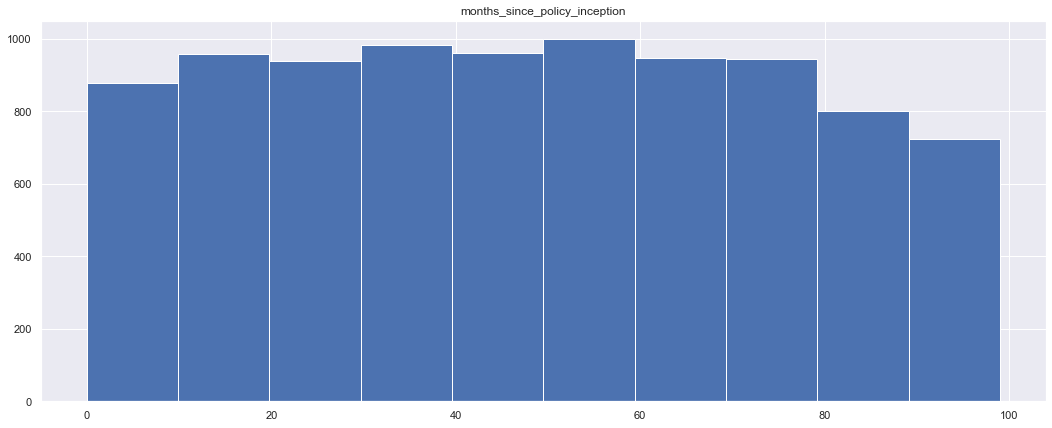

<Figure size 144x144 with 0 Axes>

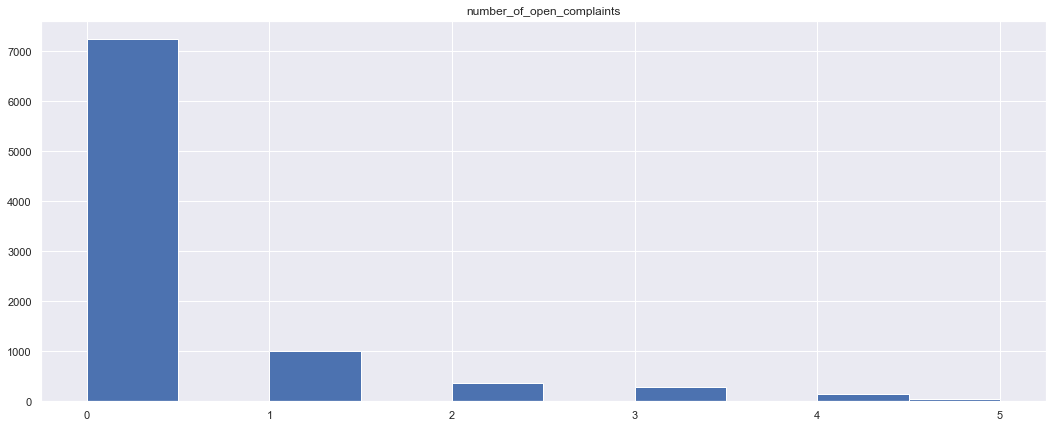

<Figure size 144x144 with 0 Axes>

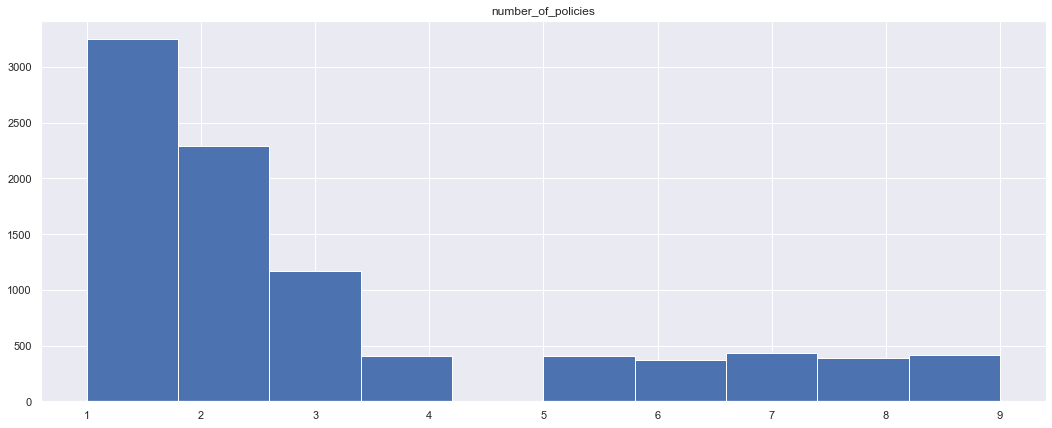

<Figure size 144x144 with 0 Axes>

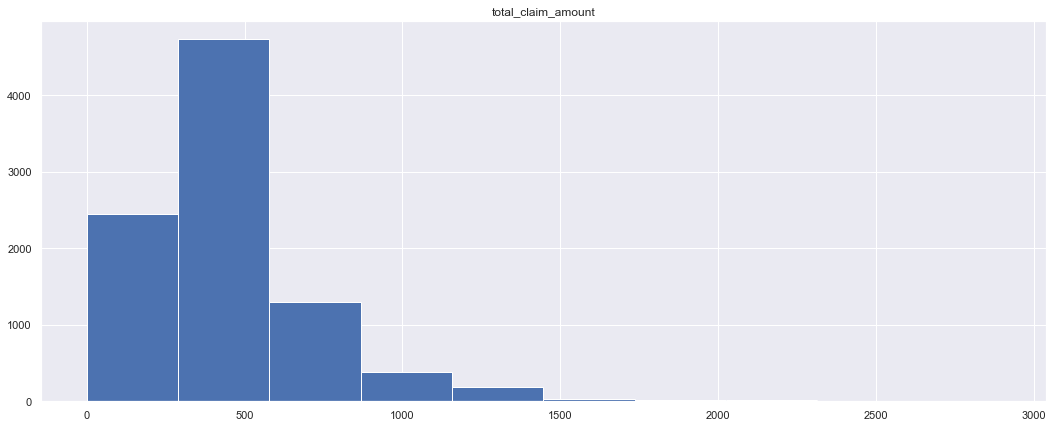

<Figure size 144x144 with 0 Axes>

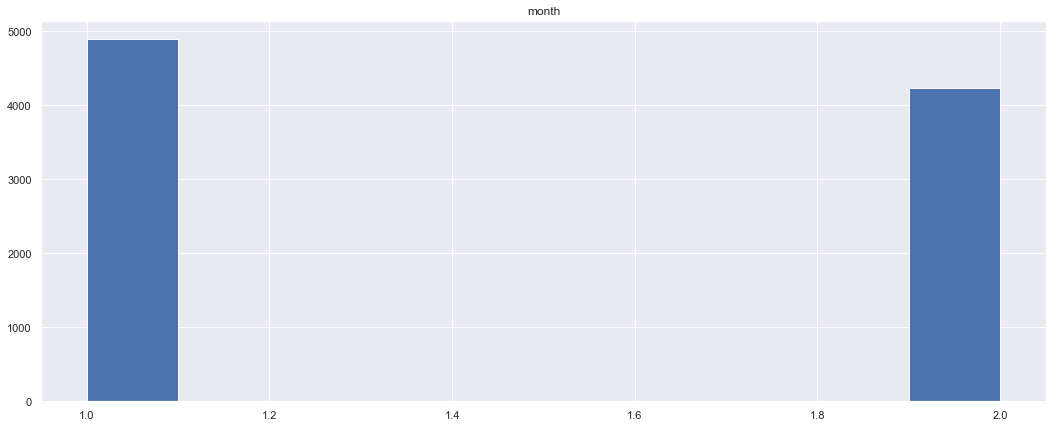

<Figure size 144x144 with 0 Axes>

In [54]:
for col in list_col_num:
    numerical[col].hist()
    plt.title(col)
    plt.figure(figsize=(2,2)) # I am not able to adapt the size of the plots.
    plt.show()

In [58]:
# Now we are going to normalize some variables

numerical_copy=numerical.copy()

In [59]:
def log_lmbda(x):
    return np.log(x) if np.isfinite(np.log(x)) else np.NAN

# log_lmbda = lambda x: np.log(x) if np.isfinite(np.log(x)) else np.NAN  --> another way to write it

C:\Users\Xabi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


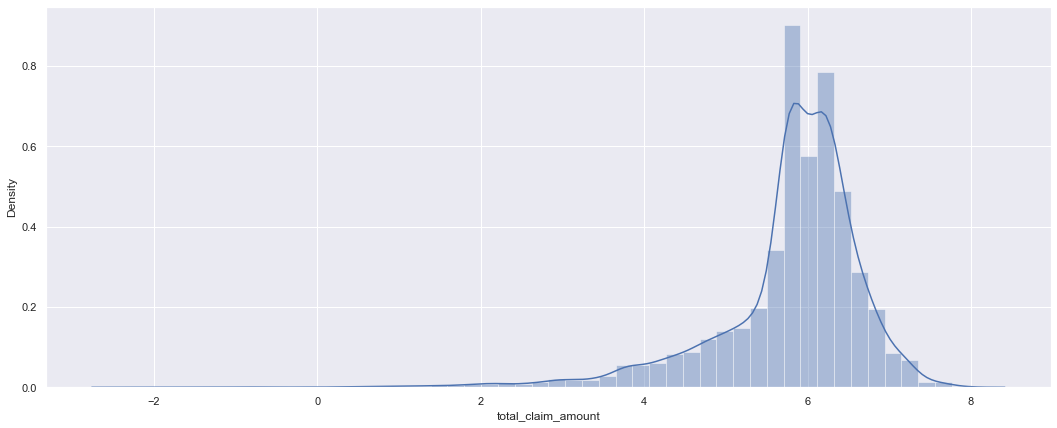

In [60]:
# We will convert the plot of the 'total_claim_amount' variable into a normal distribution.

numerical_copy['total_claim_amount'] = numerical_copy['total_claim_amount'].apply(log_lmbda)

numerical_copy['total_claim_amount'] = numerical_copy['total_claim_amount'].fillna(np.mean(numerical_copy['total_claim_amount']))

sb.distplot(numerical_copy['total_claim_amount'])
plt.show()

C:\Users\Xabi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


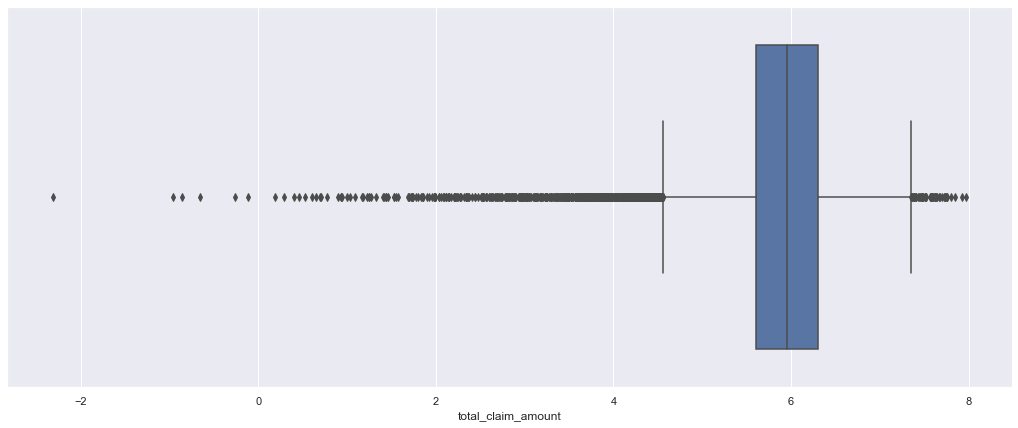

In [61]:
sb.boxplot(numerical_copy['total_claim_amount'])
plt.show()

C:\Users\Xabi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


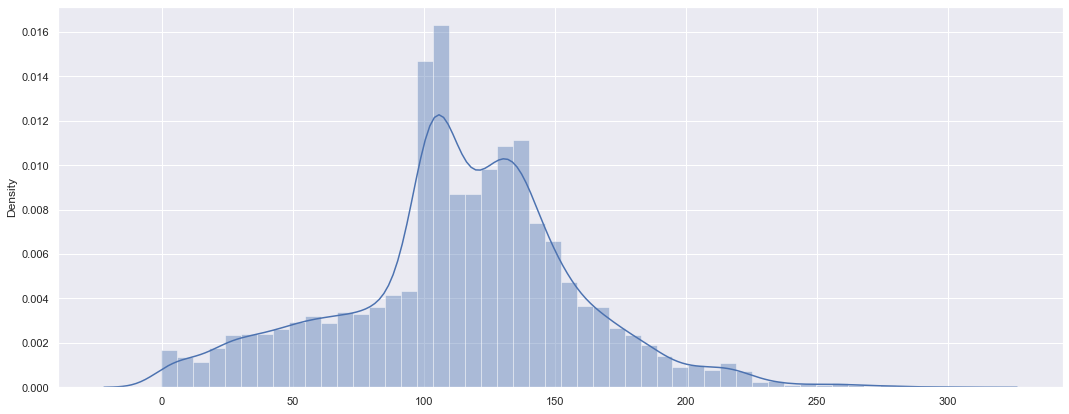

In [62]:
numerical_copy['total_claim_amount'] = np.where(numerical_copy['total_claim_amount']<=0, np.NAN, numerical_copy['total_claim_amount']) 

numerical_copy['total_claim_amount'] = numerical_copy['total_claim_amount'].fillna(numerical_copy['total_claim_amount'].mean())

transformed_data, _ci = stats.boxcox(numerical_copy['total_claim_amount'])

sb.distplot(transformed_data)
plt.show()

In [63]:
numerical_copy['total_claim_amount'].value_counts().head()

5.758271    116
5.679490    110
5.743003    108
5.859075    105
5.802722    102
Name: total_claim_amount, dtype: int64

In [64]:
# The are no features with a correlation higher or equalto 0.9 (see dataframe below below)

numerical1=numerical.drop('total_claim_amount', axis=1) # drop the target variable to check the correlation
correlation= numerical1.corr(method='pearson')
correlation

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,-0.006096
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,0.000169
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.011467
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,-0.020921
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.011010
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.006335
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,0.009305
month,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,1.000000


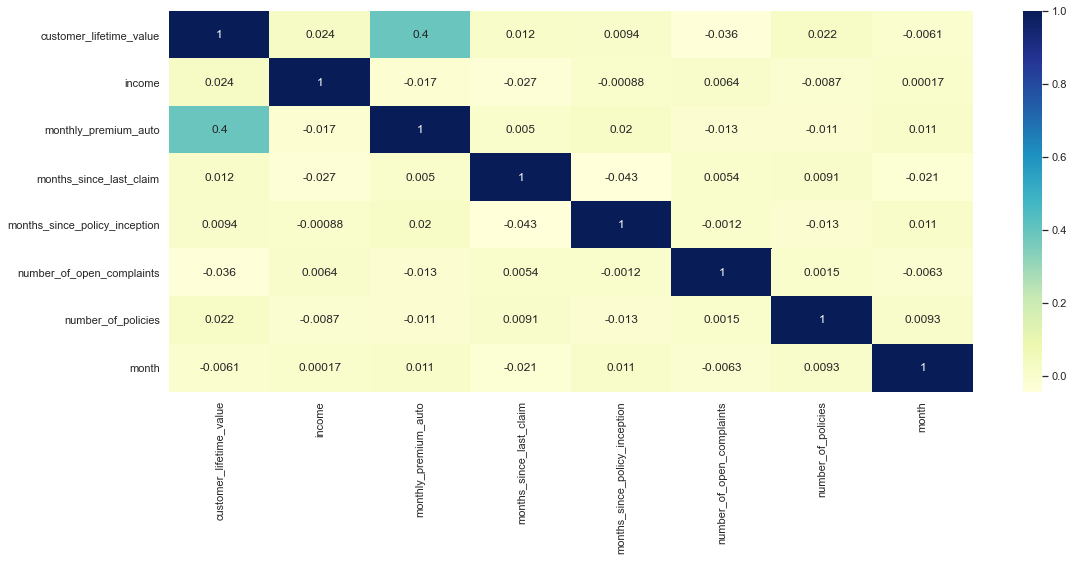

In [65]:
# Heatmap
sb.heatmap(correlation,cmap="YlGnBu", annot=True)
plt.show()

## 5 - Modeling
In the following cells we are going to create a model.

*X-y split*

In [71]:
X_num=numerical1
y_num=numerical['total_claim_amount']

*Normalize (numerical)*

In [72]:
normalizer = StandardScaler() 
normalizer.fit(X_num)
X_stand = normalizer.transform(X_num)
X_stand

array([[-0.76287773,  0.61282744, -0.70392465, ..., -0.42224956,
        -0.82264788,  1.07530438],
       [-0.14924546, -1.23961684,  0.02269103, ..., -0.42224956,
         2.10615996, -0.92996924],
       [ 0.71063622,  0.36570978,  0.42959581, ..., -0.42224956,
        -0.40424676,  1.07530438],
       ...,
       [ 0.02313483, -1.23961684, -0.23889062, ...,  2.87324529,
        -0.40424676,  1.07530438],
       [-0.06993547, -0.51735647,  0.08082028, ..., -0.42224956,
         0.01415436,  1.07530438],
       [-0.78495478, -1.23961684, -0.47140763, ..., -0.42224956,
        -0.82264788,  1.07530438]])

*One Hot/Label Encoding (categorical).*

In [73]:
categoricals.head(3)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize


In [74]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(categoricals)

OneHotEncoder(drop='first')

In [75]:
encoded = encoder.transform(categoricals).toarray()
encoded

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [76]:
encoder.categories_

[array(['AA10041', 'AA11235', 'AA16582', ..., 'ZZ89380', 'ZZ91716',
        'ZZ97035'], dtype=object),
 array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
       dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Basic', 'Extended', 'Premium'], dtype=object),
 array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
       dtype=object),
 array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
       dtype=object),
 array(['F', 'M'], dtype=object),
 array(['Rural', 'Suburban', 'Urban'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object),
 array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
        'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
        'Special L3'], dtype=object),
 array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object),
 array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=obje

In [77]:
# Concatenate the numerical standarized and categorical encoded data.
X_st_enc = np.concatenate([X_stand, encoded], axis=1)
X_st_enc.shape

(9134, 9184)

### Linear Regression
*Train-test split.*

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_st_enc, y_num, test_size=0.3, random_state=42)

*Apply linear regression*

In [80]:
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [81]:
predictions  = model.predict(X_test)
predictions.shape

(2741,)

## 6 - Model Validation
The last thing to do will be to validate the model through the following metrics: **R2, MSE, RMSE, MAE**.

In [97]:
r2=r2_score(y_test, predictions)
rmse=mean_squared_error(y_test, predictions, squared=False)
mse=mean_squared_error(y_test, predictions)
mae=mean_absolute_error(y_test,predictions)

print('The r2 value is {}'.format(round(r2,3)))
print('The Mean Square Error  error value is {}'.format(round(mse,2)))
print('The Root Mean Square Error value is {}'.format(round(rmse,2)))
print('The Mean Absolute Error value is {}'.format(round(mae,2)))

The r2 value is 0.672
The Mean Square Error  error value is 26765.34
The Root Mean Square Error value is 163.6
The Mean Absolute Error value is 123.46


## 7 - Reporting


As we can see above, the r2 value is a relative high and good value. Even though, it would be possible to improve it by using 
other machine learning methods. The main limitation of *linear regression* is the assumption that the input data and the target variable are linearly related. For example, the decission trees would be able to handle non linearity.
On the other hand, it can be said, that the Mean Absolute Error (and in consequence the other two error metrics as well) is pretty high compared to the mean value of the target variable. Another possible improvement could be to use other normalization methods.